<a href="https://colab.research.google.com/github/netaelmaliach/imageClassifier/blob/main/imageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join
import random

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test) 

In [ ]:
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

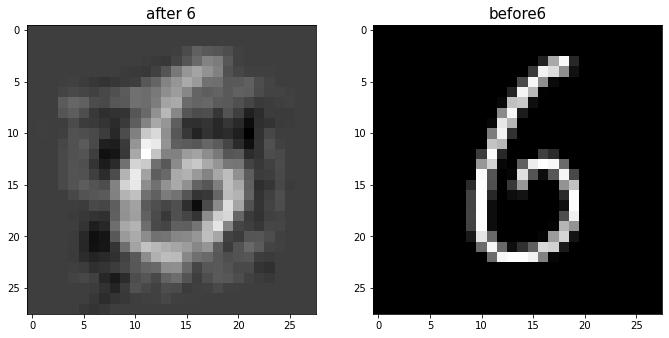

In [ ]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la
import math

input_path = 'input'

training_images_filepath = join(input_path, '/content/train-images.idx3-ubyte')
training_labels_filepath = join(input_path, '/content/train-labels.idx1-ubyte')
test_images_filepath = join(input_path, '/content/t10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, '/content/t10k-labels.idx1-ubyte')

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

data=np.asarray(x_train)
m=100               #number of photos in x

test_data = np.asarray(x_test)
test_labels = np.asarray(y_test)
y_train = np.asarray (y_train)

#a,b 


def pca (p , data):
  first=True
  for i in range(m):
    if first==True:
        x=np.array(data[i].flatten())
        first=False
    else:
      curr=np.array(data[i].flatten())
      x=np.column_stack((x,curr))

  x=x.astype(float) 
  for i in range(len(x)):
    for j in range(len(x[i])):
      x[i][j]=x[i][j]/255-0.5 

  teta=(np.matmul(x,np.transpose(x)))
  for w in range(len(teta)):                    
    for y in range(len(teta[0])):
      teta[w,y]=teta[w,y]*float(1/m)
  val, u =np.linalg.eigh(teta)
  idx = val.argsort()[::-1]   
  val = val[idx]
  u = u[:,idx]

  up=u[:,0:p]
  return up , val , x


def printSingularValues (val):
  for i in range(len(val)):
      if val[i]>0:
        val[i]=math.sqrt(val[i])
      else:
        val[i]=0
  print (val.round(decimals=5))
  print(" ")


def printExample (x, up):
  images_2_show = []
  titles_2_show = []
  r = random.randint(0, m-1)
  photo=x[:,r]

  photo=np.matmul(np.transpose(up),photo)
  photo=np.matmul(up,photo)
  photo = np.reshape(photo, (-1, 28))

  images_2_show.append(photo)
  titles_2_show.append('after ' + str(y_train[r]))  
  images_2_show.append(x_train[r])
  titles_2_show.append('before' + str(y_train[r]))  
  show_images(images_2_show,titles_2_show)


#b -main
_up,_val,x =pca(20,data)
#printSingularValues(_val)
printExample(x,_up)



In [ ]:
#c

def randomCenters(k,p):
  imgarr=[]
  centers=[]
  for i in range(k):
    for j in range(p):
      imgarr.append(random.uniform(-0.5,0.5))
    centers.append(imgarr)
    imgarr=[] 
  return centers


def kmeans(k,p,centers):

  datarr=np.array(centers) 

  uphotos=[]
  for i in range(m):
    imgarr=x[:,i]
    imgarr=np.matmul(np.transpose(_up),imgarr)
    uphotos.append(imgarr)
  uphotos=np.array(uphotos)  


  minsum=9999999
  sum=0
  cen=-1
  clusters=[]
  for j in range(k):
    row = []
    clusters.append(row)
  change=True
  prevcenter=[[] for _ in range(k)]
  
  itcounter = 0
  while(change and itcounter<1000):
    itcounter = itcounter + 1
    for i in range(len(uphotos)):
      for j in range(len(centers)):
        for v in range (len(centers[0])):
          sum=sum+abs((centers[j][v])-(uphotos[i][v]))
        if(sum<minsum):
          minsum=sum
          cen=j
        sum=0  
      clusters[cen].append(i)
      cen=-1  
      minsum=9999999
      sum=0

    samelen=True
    for i in range(len(centers)):
      if(len(centers[i])!=len(prevcenter[i])):
        samelen=False
    if(samelen):    
      for i in range(len(centers)):
        for j in range(len(centers[i])):
          if(centers[i][j]==prevcenter[i][j]):
            change=False

  #update centers
    if(change):
      sumean=0
      for i in range(len(clusters)):
        for j in range(len(centers[1])):  
          for r in range(len(clusters[i])):
            sumean=sumean+uphotos[clusters[i][r]][j]
          if(len(clusters[i])>0):
            centers[i][j]=sumean/len(clusters[i])
          sumean=0
    prevclusters=clusters
    clusters=[]
    for j in range(k):
      row = []
      clusters.append(row)


  return (prevclusters,centers)




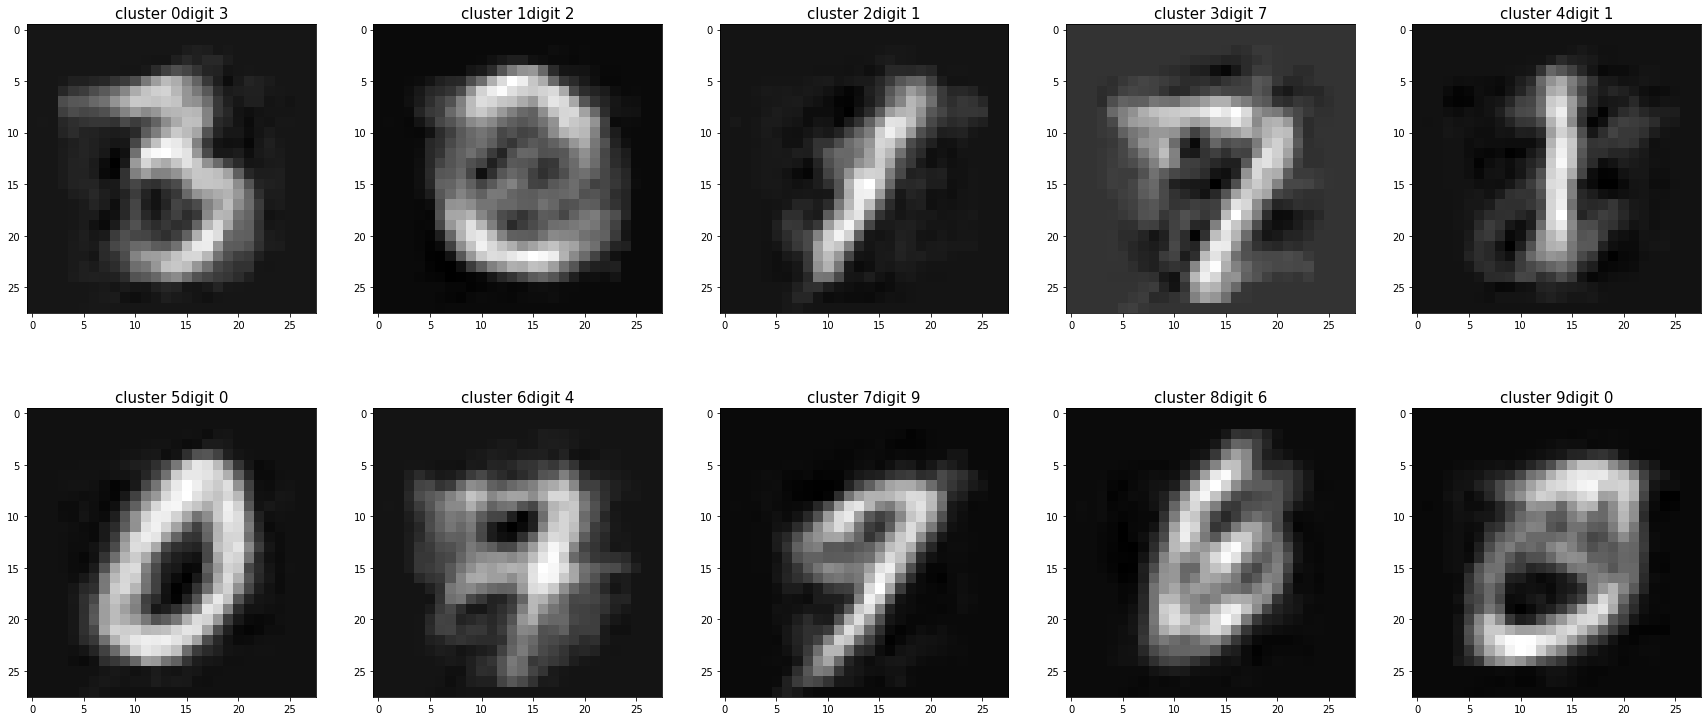

In [ ]:
# d+e

def max(a):
  max = -1
  max_index = -1
  for i in range (len(a)):
    if (a[i]> max):
      max_index = i
      max = a[i]
  return max_index 

def classify_digits (clusters, centers):
  counter = np.zeros(10 , int)
  max_array = np.zeros(10, int)

  for i in range (len(clusters)):
    counter = np.zeros(10 , int)
    for j in range (len(clusters[i])):
      digit = y_train[clusters[i][j]]
      counter[digit] = counter[digit]+1
    max_array[i] =max(counter)

  return max_array

# e -main

(clusters_,centers_) = kmeans(10,20,randomCenters(10,20))
digits_array = classify_digits(clusters_,centers_)
images_2_show = []
titles_2_show = []
for i in range(10):
    photo=np.matmul(_up,centers_[i])
    photo= np.reshape(photo, (-1, 28))
    images_2_show.append(photo)
    titles_2_show.append("cluster "+str(i) + "digit " + str(digits_array[i]) )
show_images(images_2_show,titles_2_show)



In [ ]:
#f 

def success_rate (test_data, test_labels,digits_array,_up, centers):
  correct_ans = 0
  d_array = np.zeros(10)
  min_index = -1
  for  i in range (len(test_data)):
    img = np.array(test_data[i].flatten())
    img = np.matmul (np.transpose(_up), img)
    for j in range (10):
        d_array[j] = np.linalg.norm (centers[j] - img)
    min_index = np.argmin(d_array)
    if (test_labels[i]) == (digits_array[min_index]):
      correct_ans = correct_ans + 1   
  success_per = (correct_ans / len(test_data))*100
  return success_per

#f - main 
success_rate_ = success_rate(test_data,test_labels,digits_array,_up,centers_)
print ("success percents are " +str(success_rate_) + "%")

        
 

success percents are 28.22%


In [ ]:
#g 
def threeTimesRun ():
  for i in range (3):
    (clusters_i,centers_i) = kmeans(10,20,randomCenters(10,20))
    digits_array_i = classify_digits(clusters_i,centers_i)
    success_rate_i = success_rate(test_data,test_labels,digits_array_i,_up,centers_i)
    print ("success percents for run number " + str(i+1) + " are " +str(success_rate_i) + "%")

#g-main
threeTimesRun()





success percents for run number 1 are 23.35%
success percents for run number 2 are 25.569999999999997%
success percents for run number 3 are 24.32%


success percents are 15.75%


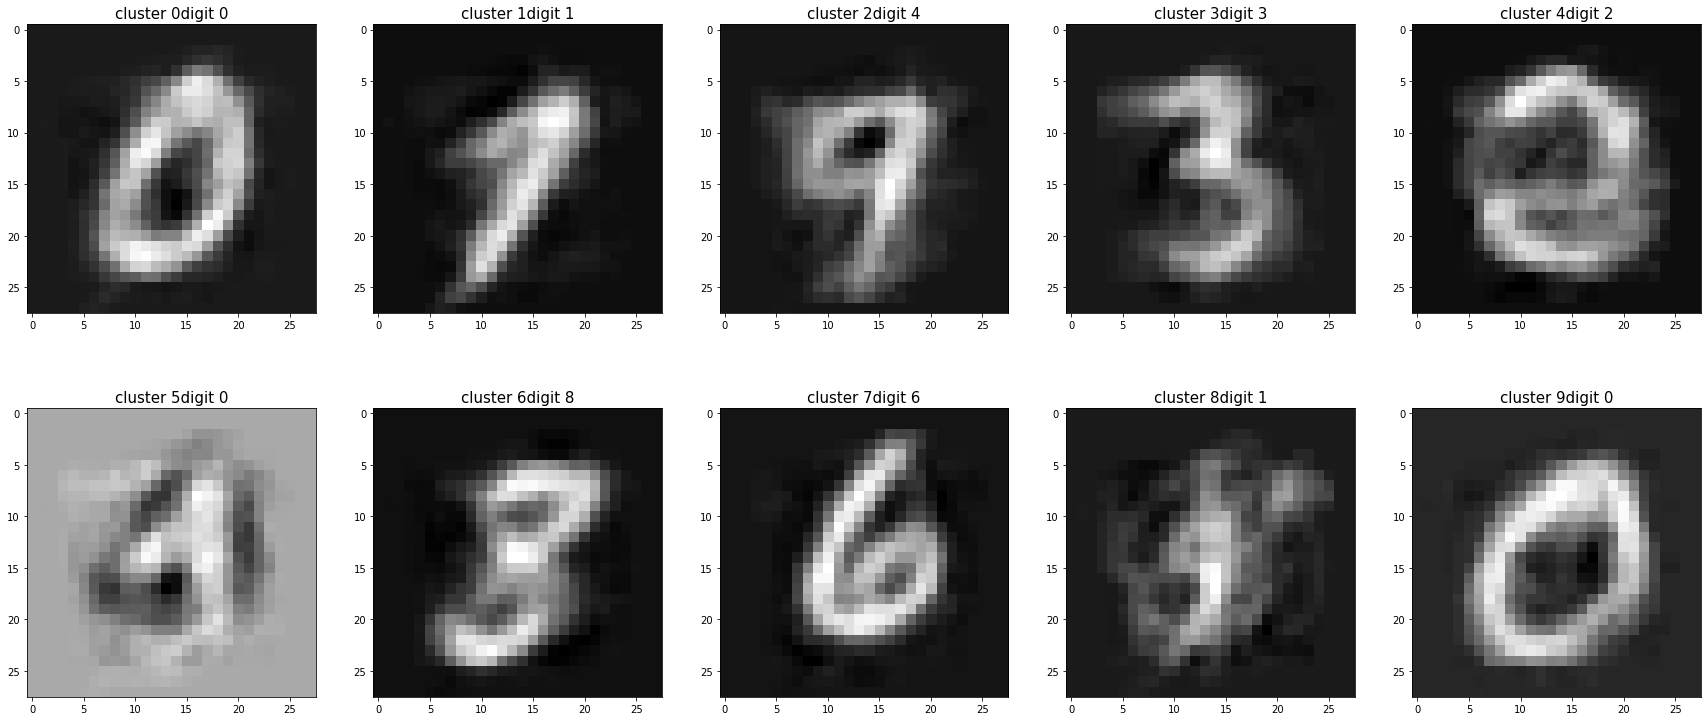

In [ ]:
#h- main

up_e,val_e,x_e =pca(12,data)
(clusters_e,centers_e) = kmeans(10,12,randomCenters(10,12))
digits_array_e = classify_digits(clusters_e,centers_e)
success_rate_e = success_rate(test_data,test_labels,digits_array_e,up_e,centers_e)
print ("success percents are " +str(success_rate_e) + "%")

images_2_show = []
titles_2_show = []
for i in range(10):
    photo=np.matmul(up_e,centers_e[i])
    photo= np.reshape(photo, (-1, 28))
    images_2_show.append(photo)
    titles_2_show.append("cluster "+str(i) + "digit " + str(digits_array_e[i]) )
show_images(images_2_show,titles_2_show)



success percents are 38.72%


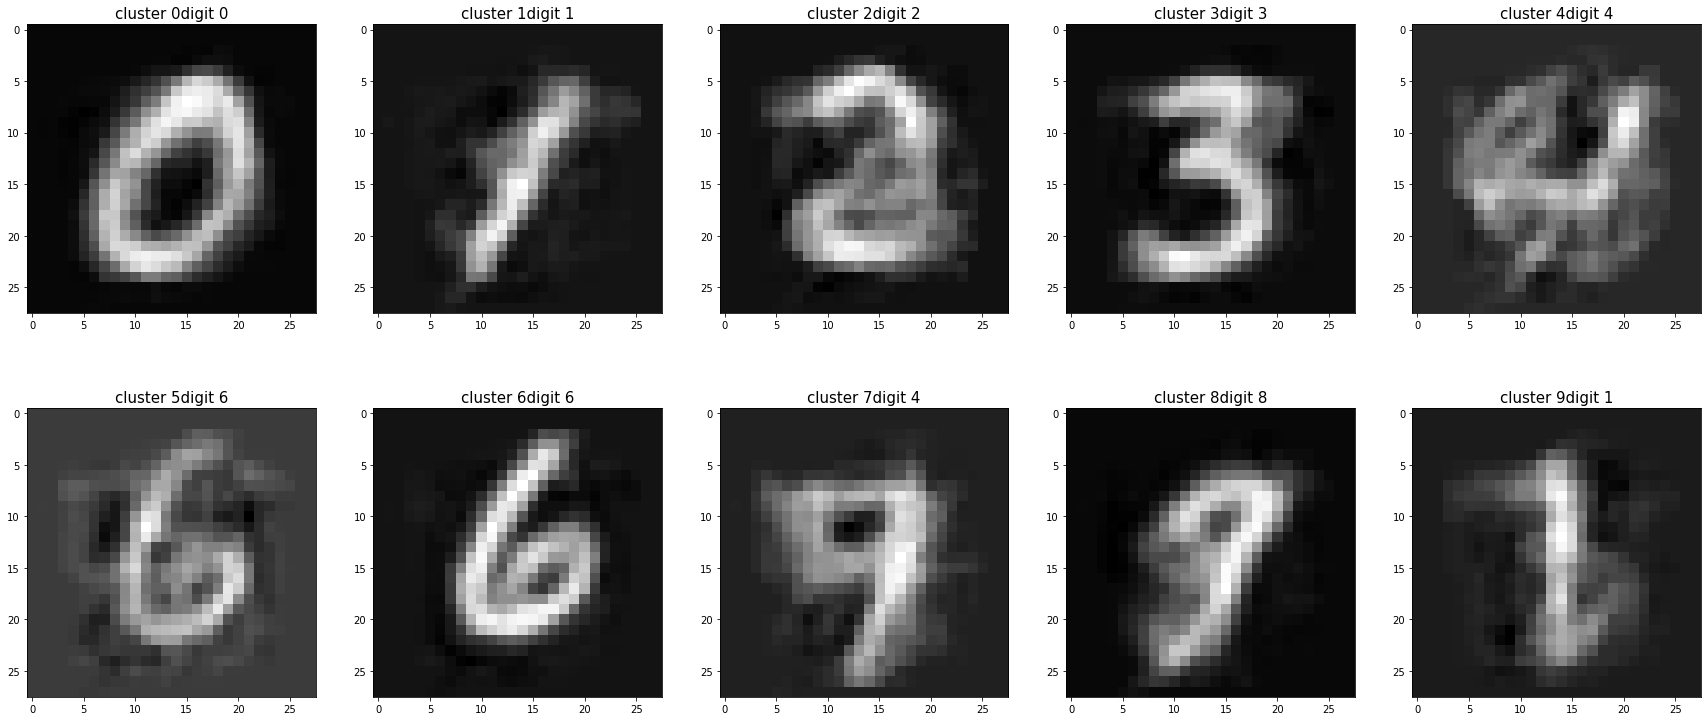

In [ ]:
#i 

def isDone_(a):
  for i in range(10):
    if (len(a[i])<10):
        return 1
  return 0

def meanCenters_ (_up,labels,data):
  
  isDone = False
  c =0
  digitsarr = []
  for j in range(10):
    row = []
    digitsarr.append(row)

  while( not isDone):
    counter = 0
    if len(digitsarr[labels[c]]) == 10 :
      if (isDone_(digitsarr) == 0):
        isDone = True
    else:
      digitsarr[labels[c]].append(c)
    c = c + 1

  meanCenters= []
  for j in range(10):
    row = []
    meanCenters.append(row)

  for i in range (10):
    meanarr = []
    for j in range (10):
      b = data[digitsarr[i][j]].flatten()
      meanarr.append(b)
    meanarr = np.transpose(meanarr)
    for l in range (784):
      meanCenters[i].append (((np.sum(meanarr[l]))/784)/255-0.5)
    meanCenters[i] = (np.matmul(np.transpose(_up),meanCenters[i]))

  return np.array(meanCenters)   


#main - i 

(clusters_m,centers_m) = kmeans(10,20,meanCenters_(_up,y_train,data))
digits_array_m = classify_digits(clusters_m,centers_m)
success_rate_m = success_rate(test_data,test_labels,digits_array_m,_up,centers_m)
print ("success percents are " +str(success_rate_m) + "%")


images_2_show = []
titles_2_show = []
for i in range(10):
    photo=np.matmul(_up,centers_m[i])
    photo= np.reshape(photo, (-1, 28))
    images_2_show.append(photo)
    titles_2_show.append("cluster "+str(i) + "digit " + str(digits_array_m[i]) )
show_images(images_2_show,titles_2_show)


